<a href="https://colab.research.google.com/github/guptadarsh/ShopInsights/blob/main/ShopInsights_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem Statement
- The Management team at company wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
w_df = pd.read_csv('company_data.csv')

In [ ]:
w_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
w_df.shape

(550068, 10)

In [ ]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
columns = ['Occupation', 'Marital_Status', 'Product_Category']
w_df[columns] = w_df[columns].astype('object')
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [ ]:
w_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [ ]:
w_df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
w_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#Observation
- Datasets contain 550068 rows and 10 columns.
- No missing values are found in the dataset.
- There are 3631 distinct Product IDs, 2 unique Genders, 21 distinct Occupations, 3 distinct City Categories, 2 unique Marital Status values, and 20 unique Product Category values.
- The dataset reveals that unmarried males in City Category B, aged 26-35, are the highest purchasers, primarily buying products from category 5.
- Males outpace females in terms of purchasing.
- The average purchase amount is 9263.968713, while the maximum purchase amount is 23961. This suggests that the mean is influenced by outliers.


In [ ]:
w_df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
w_df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

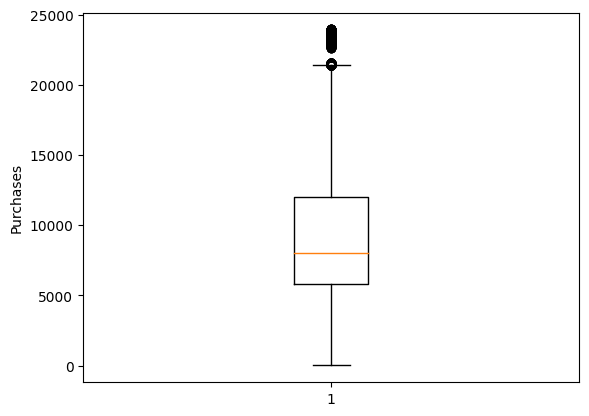

In [ ]:
plt.boxplot(w_df['Purchase'])
plt.ylabel('Purchases')
plt.show()

In [ ]:
Q1 = np.percentile(w_df['Purchase'], 25)
Q1

5823.0

In [ ]:
Q3 = np.percentile(w_df['Purchase'], 75)
Q3

12054.0

In [ ]:
IQR_Purchases = Q3 - Q1
IQR_Purchases

6231.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR_Purchases
upper_limit

21400.5

In [ ]:
(w_df['Purchase'] > upper_limit).sum()

2677

In [ ]:
(w_df['Purchase'] > upper_limit).sum() / len(w_df)

0.004866671029763593

# Observation
- Mean = 9263.968713 is affected by outliers
- Median (50 percentile) = 8047.000000
- Upon Examination, **2677** outliers were detected in the dataset. These outliers represent values that deviate significantly form the typical range of purchases.
- **0.4866%** of pruchases are extream outliers.

In [ ]:
clipped_purchases = np.clip(w_df['Purchase'],
                            np.percentile(w_df['Purchase'], 5),
                            np.percentile(w_df['Purchase'], 95))
clipped_purchases

0          8370
1         15200
2          1984
3          1984
4          7969
          ...  
550063     1984
550064     1984
550065     1984
550066     1984
550067     1984
Name: Purchase, Length: 550068, dtype: int64

# Non Graphical Analysis

In [ ]:
w_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
w_df['Gender'].value_counts()/len(w_df)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [ ]:
w_df['Age'].value_counts()/len(w_df)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

In [ ]:
w_df['Occupation'].value_counts()/len(w_df)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

In [ ]:
w_df['Stay_In_Current_City_Years'].value_counts()/len(w_df)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
w_df['Marital_Status'].value_counts()/len(w_df)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

In [ ]:
w_df['Product_Category'].value_counts()/len(w_df)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

# Insights
- 59.034701% of individuals are single, while 40.965299% are in a marital relationship.
- 75.310507% of individuals are identified as male, while 24.689493% are identified as female.
- The largest demographic, comprising 9.919974%, falls within the 26-35 age bracket.
- The most prevalent occupation among users is occupation 4, accounting for 13.145284%.
- The most frequently purchased product among users is product category 5, representing 27.438971%.


# Visual Analysis - Univariate and Bivariate

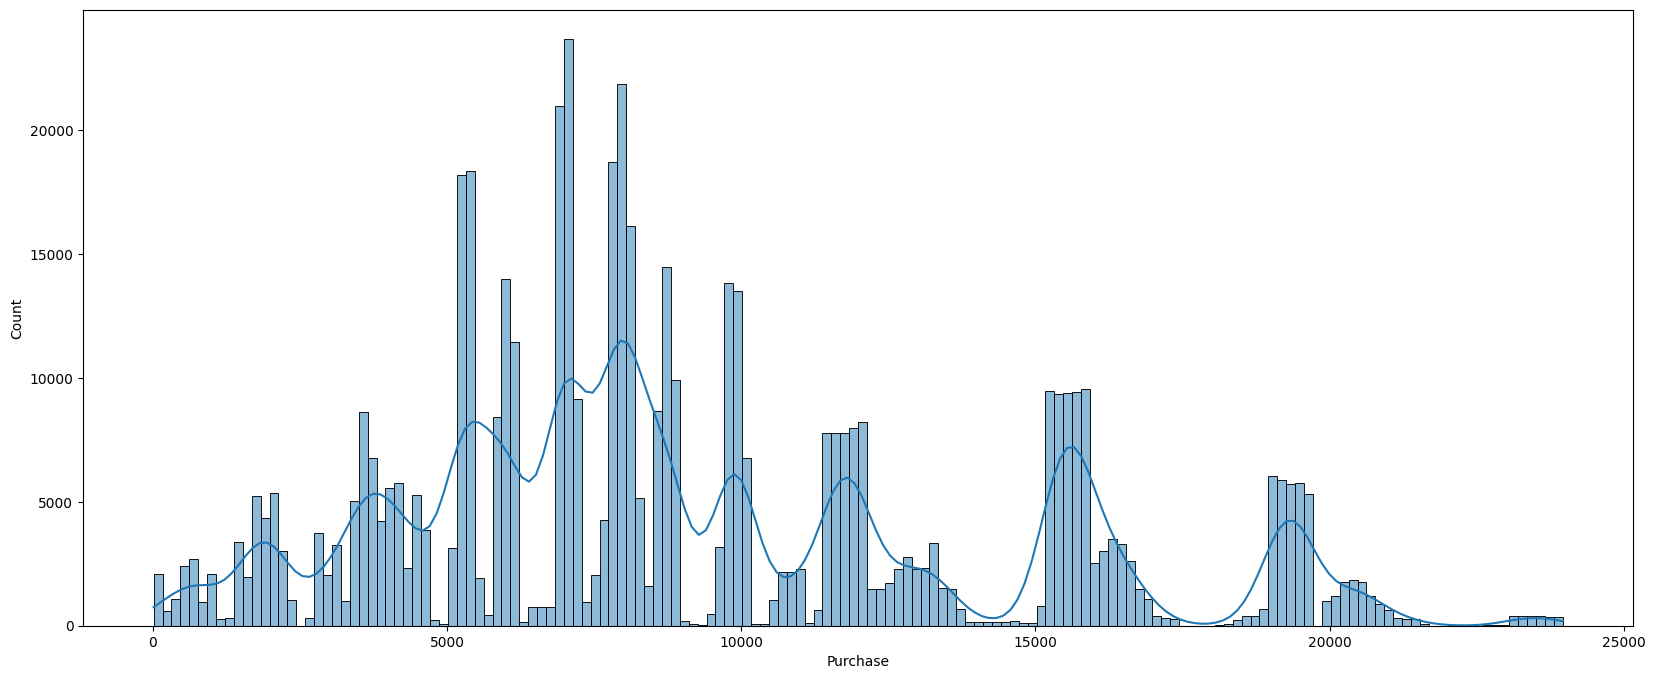

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=w_df, x='Purchase', kde=True,)
plt.show()

[]

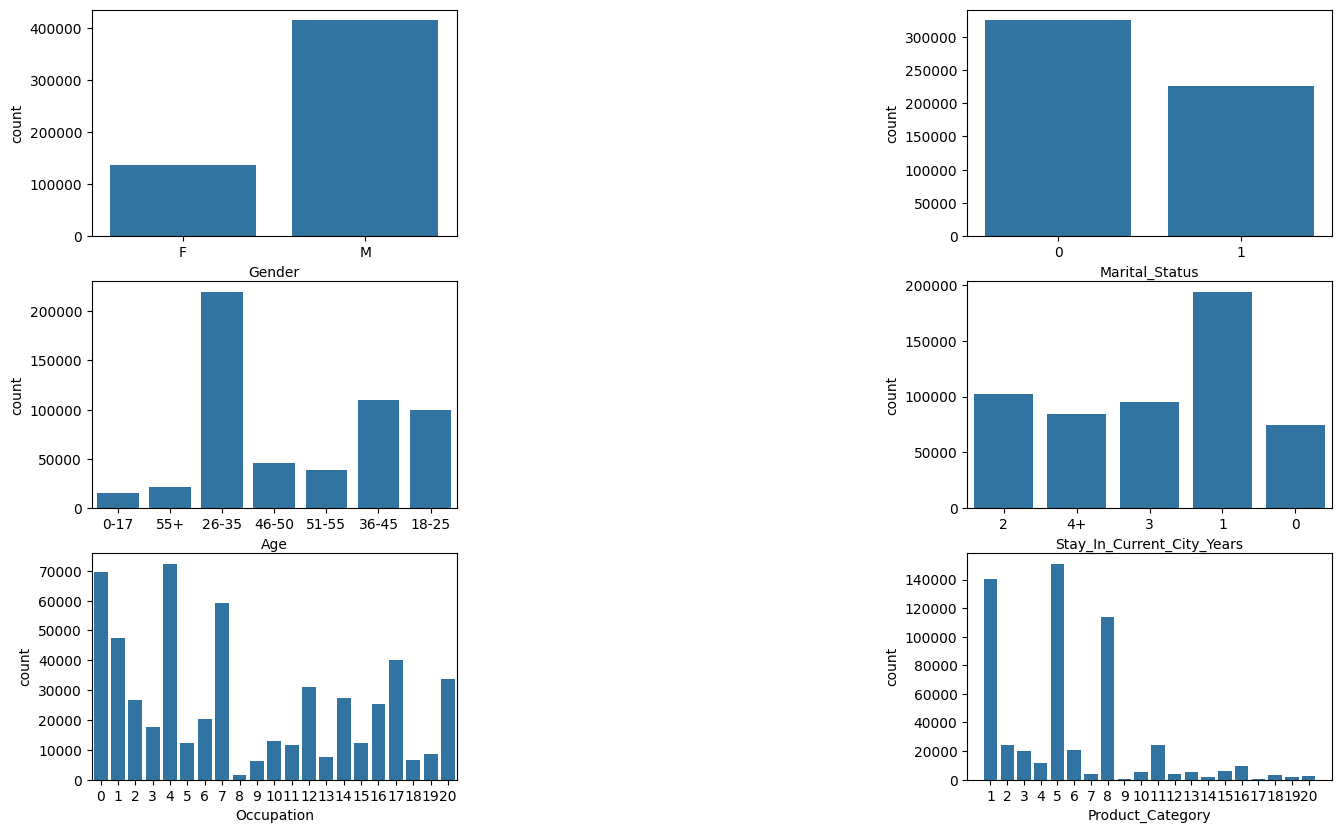

In [ ]:
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.countplot(data=w_df, x='Gender')
plt.subplot(3,3,3)
sns.countplot(data=w_df, x='Marital_Status')
plt.subplot(3,3,4)
sns.countplot(data=w_df, x='Age')
plt.subplot(3,3,6)
sns.countplot(data=w_df, x='Stay_In_Current_City_Years')
plt.subplot(3,3,7)
sns.countplot(data=w_df, x='Occupation')
plt.subplot(3,3,9)
sns.countplot(data=w_df, x='Product_Category')
plt.plot()

[]

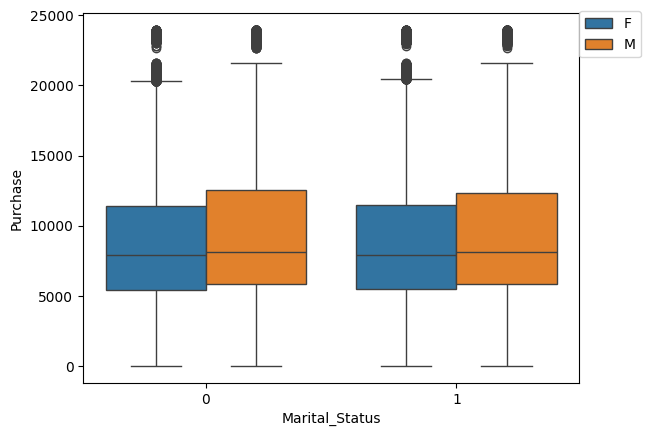

In [ ]:
sns.boxplot(data=w_df, x='Marital_Status', y='Purchase', hue='Gender')
plt.legend(loc=(1,0.88))
plt.plot()

[]

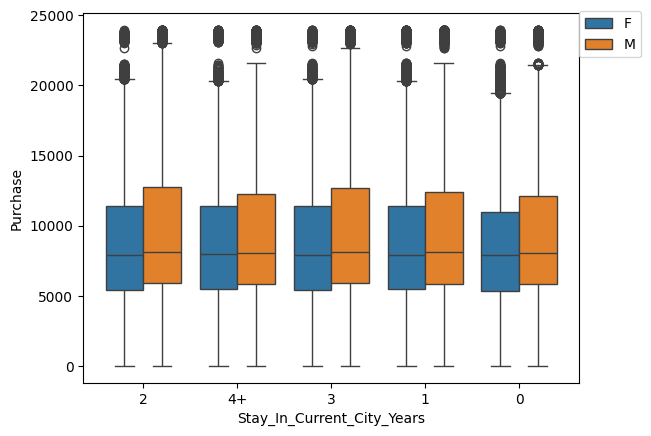

In [ ]:
sns.boxplot(data=w_df, x='Stay_In_Current_City_Years', y='Purchase', hue='Gender')
plt.legend(loc=(1,0.88))
plt.plot()

[]

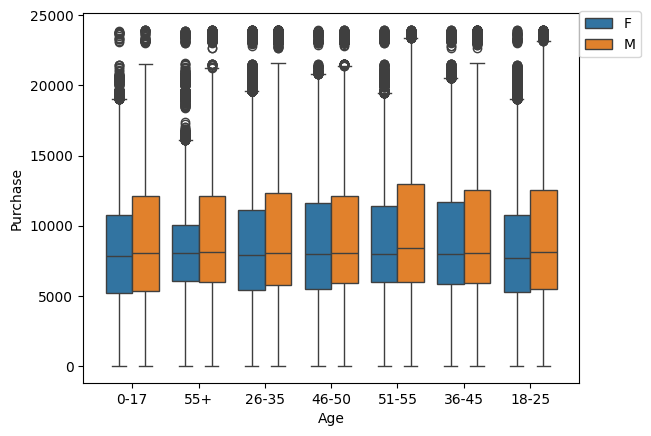

In [ ]:
sns.boxplot(data=w_df, x='Age', y='Purchase', hue='Gender')
plt.legend(loc=(1,0.88))
plt.plot()

[]

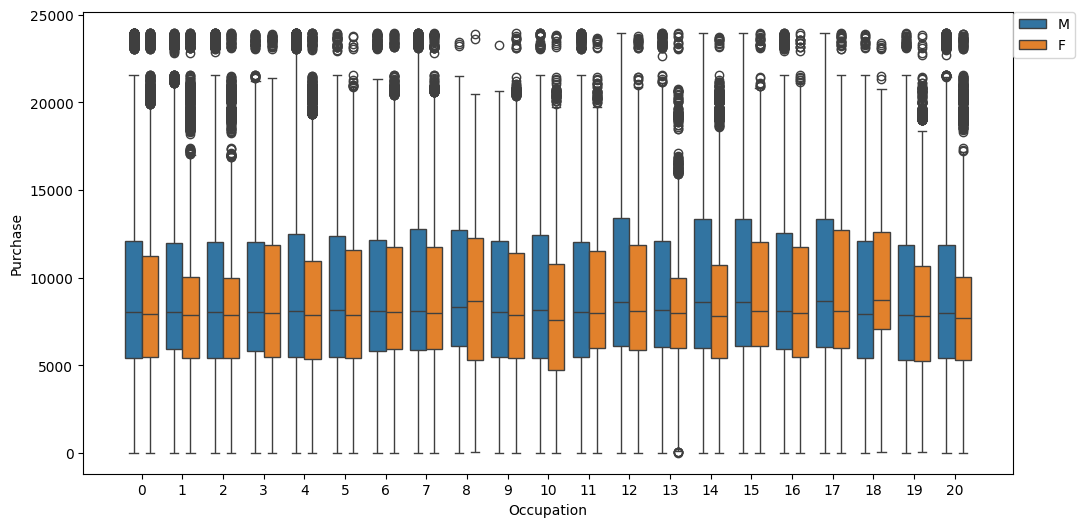

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=w_df, x='Occupation', y='Purchase', hue='Gender')
plt.legend(loc=(1,0.9))
plt.plot()

[]

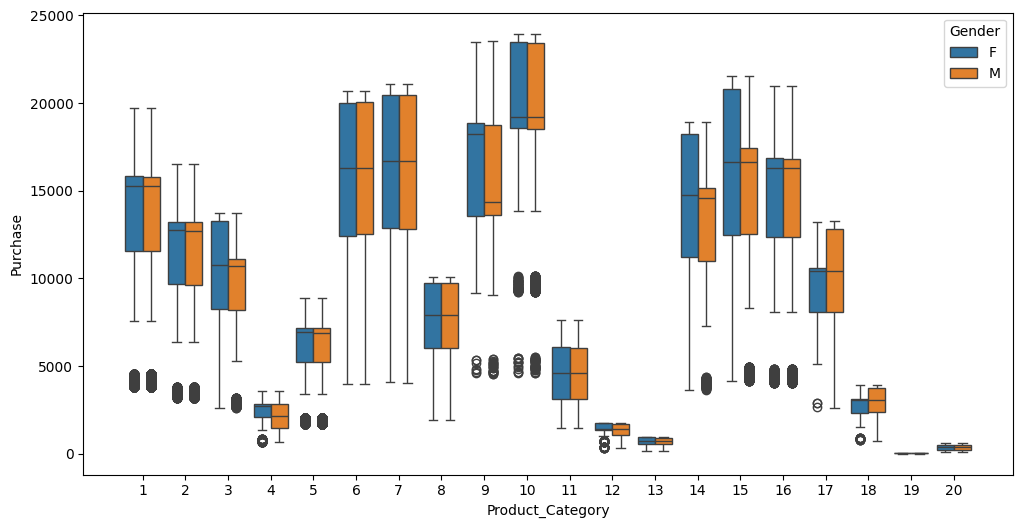

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=w_df, x='Product_Category', y='Purchase', hue='Gender')
plt.plot()

#Observation
- The largest proportion of users is male, and the majority of them are married. Additionally, the highest number of users falls within the 26-35 age group.
- Top5 maximum product categroy is 5,1,8,11,2.
- The top five product categories with the maximum user engagement are 6, 7, 14, 15 and 9.
- The average purchase of unmarried males is higher compared to females.
- Most purchases have been made by people aged 18-25.
- The purchase within product categories 5 and 6 has approximately equal numbers of males and females.
- The product categories 14 and 15 have been more frequently purchased by females compared to males.

# Data Exploration

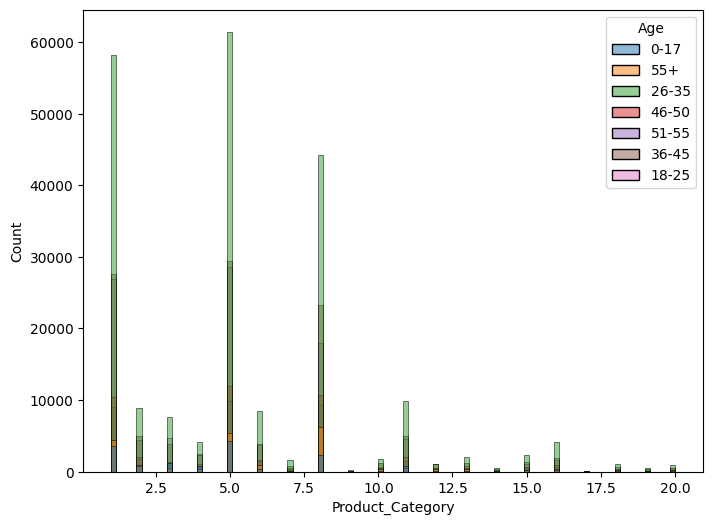

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=w_df, x='Product_Category', hue='Age')
plt.show()

# Observation
- The majority of products in categories 5, 1, and 8 have been purchased by individuals in the age group of 26-35.

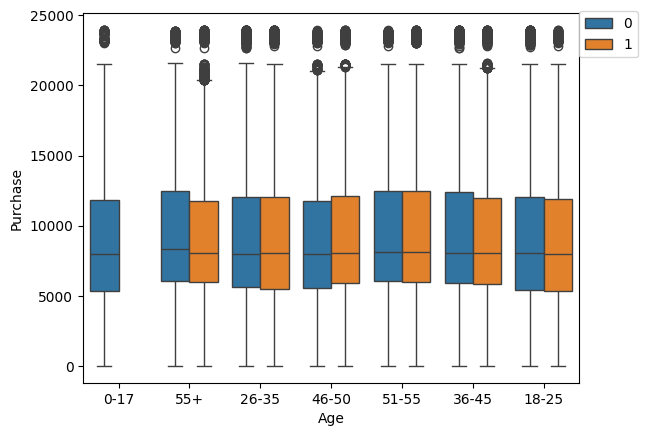

In [ ]:
sns.boxplot(data=w_df, x='Age', y='Purchase', hue='Marital_Status')
plt.legend(loc=(1,0.88))
plt.show()

# Observation
- The age groups with the highest average purchase are 18-25 and these are unmarried in comparison to the married one.
- The age groups with the highest average purchase are 26-35 and these are married in comparison to the unmarried one.

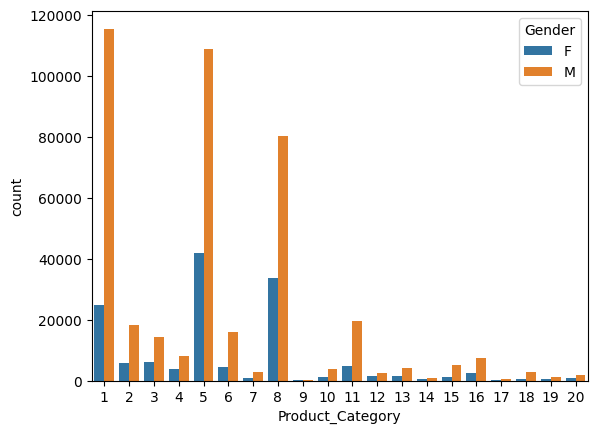

In [ ]:
sns.countplot(data=w_df, x='Product_Category', hue='Gender')
plt.show()

#Observation
- The Top5 products purchased by male customers are 1, 5, 8, 11, and 2.
- The Top5 product pruchased by Female customers are 5, 8, 1, 3 and 2.

# Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

In [ ]:
male_customers = w_df[w_df['Gender'] == 'M']
female_customers = w_df[w_df['Gender'] == 'F']

In [ ]:
male_customers['Purchase'].mean(), male_customers['Purchase'].std()

(9437.526040472265, 5092.18620977797)

In [ ]:
female_customers['Purchase'].mean(), female_customers['Purchase'].std()

(8734.565765155476, 4767.233289291458)

In [ ]:
mSample_300 = [male_customers['Purchase'].sample(300).mean() for i in range(10000)]
mSample_300 = np.array(mSample_300)

In [ ]:
mSample_300.mean(), mSample_300.std()

(9435.923817, 290.1992038746918)

In [ ]:
norm(loc=9435.923817, scale=290.1992038746918).interval(0.95)

(8867.143829063409, 10004.703804936593)

In [ ]:
fSample_300 = [female_customers['Purchase'].sample(300).mean() for i in range(10000)]
fSample_300 = np.array(fSample_300)

In [ ]:
fSample_300.mean(), fSample_300.std()

(8730.810290333333, 274.3995122145428)

In [ ]:
norm(loc=8730.810290333333, scale=274.3995122145428).interval(.95)

(8192.99712901747, 9268.623451649195)

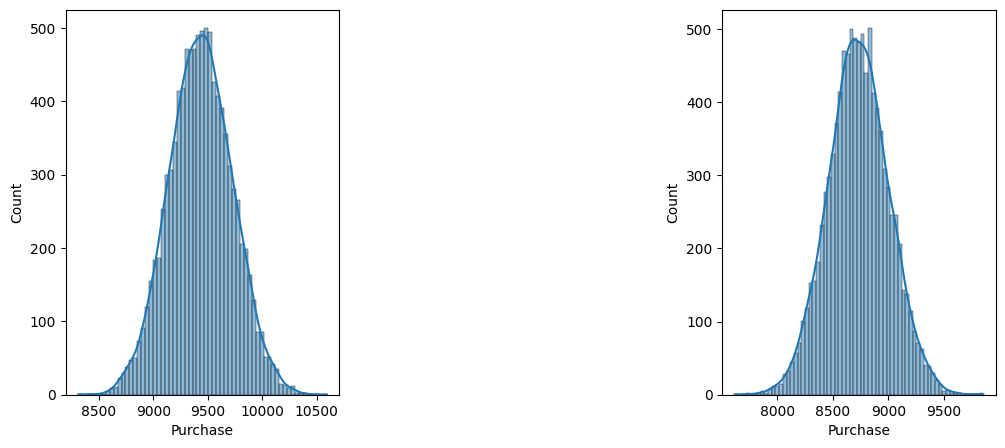

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(mSample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(fSample_300, kde=True)
plt.xlabel('Purchase')
plt.show()

In [ ]:
mSample_3000 = [male_customers['Purchase'].sample(3000).mean() for i in range(10000)]
mSample_3000 = np.array(mSample_3000)

In [ ]:
mSample_3000.mean(), mSample_3000.std()

(9436.694806600002, 92.21180029681979)

In [ ]:
norm(loc=9436.694806600002, scale=92.21180029681979).interval(0.95)

(9255.962999068635, 9617.42661413137)

In [ ]:
fSample_3000 = [female_customers['Purchase'].sample(3000).mean() for i in range(10000)]
fSample_3000 = np.array(fSample_3000)

In [ ]:
fSample_3000.mean(), fSample_3000.std()

(8734.781797099999, 86.29446200665679)

In [ ]:
norm(loc=8734.781797099999, scale=86.29446200665679).interval(0.95)

(8565.647759501691, 8903.915834698306)

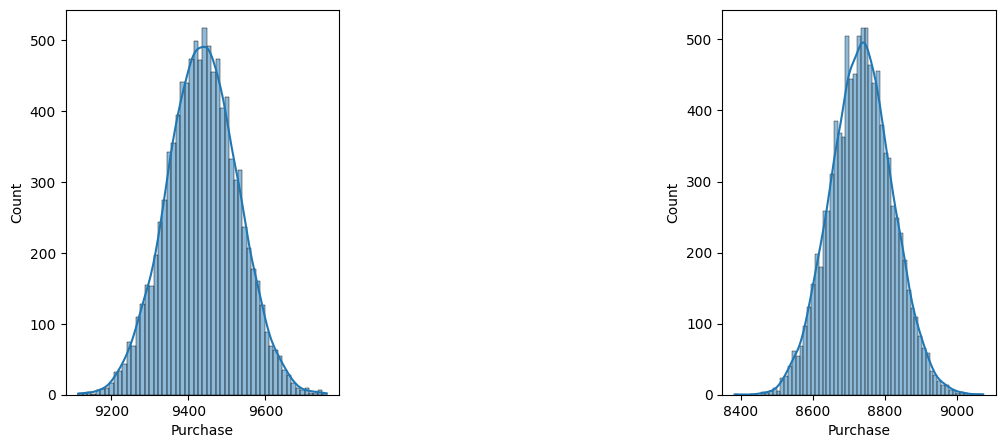

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(mSample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(fSample_3000, kde=True)
plt.xlabel('Purchase')
plt.show()

In [ ]:
mSample_30000 = [male_customers['Purchase'].sample(30000).mean() for i in range(10000)]
mSample_30000 = np.array(mSample_30000)

In [ ]:
mSample_30000.mean(), mSample_30000.std()

(9437.425253966667, 28.432692136805674)

In [ ]:
norm(loc=9437.425253966667, scale=28.432692136805674).interval(0.95)

(9381.698201395013, 9493.15230653832)

In [ ]:
fSample_30000 = [female_customers['Purchase'].sample(30000).mean() for i in range(10000)]
fSample_30000 = np.array(fSample_30000)

In [ ]:
fSample_30000.mean(), fSample_30000.std()

(8734.384639503332, 24.5081361852244)

In [ ]:
norm(loc=8734.384639503332, scale=24.5081361852244).interval(0.95)

(8686.34957525209, 8782.419703754575)

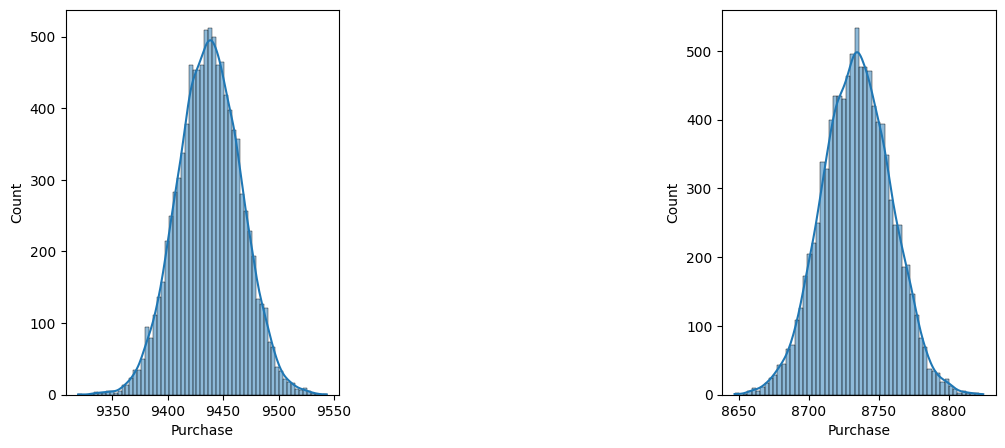

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(mSample_30000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(fSample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

# Observations for 300 Samples:
- The average purchase made by 50 male customers is 9437.53 with a standard deviation of 5092.18.
- The average purchase made by 50 female customers is 8734.57 with a standard deviation of 4767.23.
- The sample average purchase made by a sample of 300 male customers is 9435.92 with a standard deviation of 290.19.
- The sample average purchase made by a sample of 300 female customers is 8730.81 with a standard deviation of 274.39.
- The interval estimate of 300 male samples with a 95% confidence level is (8867.14, 10004.70).
- The interval estimate of 300 female samples with a 95% confidence level is (8192.99, 9268.62).
- Male customers make more purchases compared to female customers.
- The 95% confidence interval for male customers is tighter compared to the interval for female customers.

# Observations for 3000 Samples:
- The sample average purchase made by a sample of 3000 male customers is 9436.69 with a standard deviation of 92.21.
- The sample average purchase made by a sample of 3000 female customers is 8734.78 with a standard deviation of 86.29.
- The interval estimate of 3000 male samples with a 95% confidence level is (9255.96, 9617.42).
- The interval estimate of 3000 female samples with a 95% confidence level is (8565.64, 8903.91).
- Male customers make more purchases compared to female customers.

# Observations for 30000 Samples:
- The sample average purchase made by a sample of 30000 male customers is 9437.58 with a standard deviation of 28.51.
- The sample average purchase made by a sample of 30000 female customers is 8734.48 with a standard deviation of 24.18.
- The interval estimate of 30000 male samples with a 95% confidence level is (9381.69, 9493.47).
- The interval estimate of 30000 female samples with a 95% confidence level is(8687.08, 8781.89).
- Male customers make more purchases compared to female customers.

- As the sample size increases up to 30000, the sample mean of purchases for male or female customers is near the population mean of the purchase.
- As the sample size increases up to 30000, the standard deviation of male customers decreases, indicating less variability or dispersion among the data points, resulting in a taller and narrower bell curve and a more tightly spaced confidence interval.
- The margin of error, calculated as (Z - σ)/sqrt(n), decreases as the number of samples increases, leading to a smaller margin of error and a narrower confidence interval.
- As the sample size increases up to 30000, the distribution of sample means becomes approximately normally distributed. The sample average purchase of male customers is 9437.58, which is approximately the same as the population average purchase i.e. 9437.53.

# Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can company leverage this conclusion to make changes or improvements?

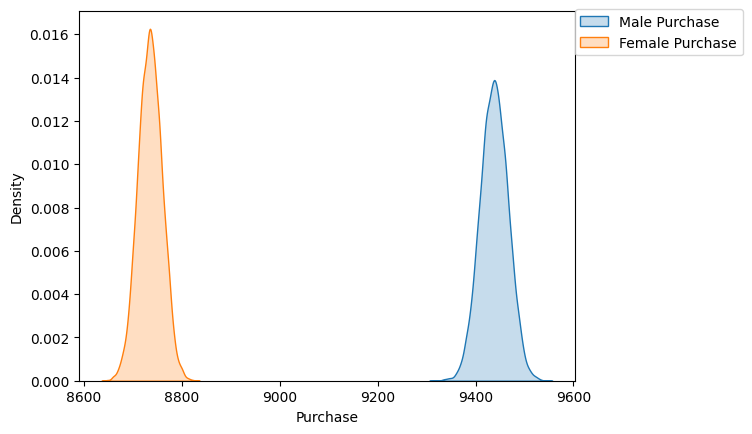

In [ ]:
sns.kdeplot(mSample_30000,  label='Male Purchase', fill=True)
sns.kdeplot(fSample_30000, label='Female Purchase', fill=True)
plt.legend(loc=(1, 0.88))
plt.xlabel('Purchase')
plt.show()

- 95% confidence intervals of average spending for males and females do not overlap, it suggests that there may be a statistically significant difference.
- The average purchase made by male customers are more as compared to averaage purchase made by female customers. Company might consider focusing on male customers since they tend to spend more in comparison to female customers.

# Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by married and unmarried customers.

In [ ]:
married_customer = w_df[w_df['Marital_Status']==1]
unmarried_customer = w_df[w_df['Marital_Status']==0]

In [ ]:
married_customer['Purchase'].mean(), married_customer['Purchase'].std()

(9261.174574082374, 5016.897377793055)

In [ ]:
unmarried_customer['Purchase'].mean(), unmarried_customer['Purchase'].std()

(9265.907618921507, 5027.347858674449)

In [ ]:
marriedSample_300 = [married_customer['Purchase'].sample(300).mean() for i in range(10000)]
marriedSample_300 = np.array(marriedSample_300)

In [ ]:
marriedSample_300.mean(), marriedSample_300.std()

(9265.218763666668, 290.69350115013145)

In [ ]:
norm(loc=9265.218763666668, scale=290.69350115013145).interval(0.95)

(8695.469970872557, 9834.967556460779)

In [ ]:
unmarriedSample_300 = [unmarried_customer['Purchase'].sample(300).mean() for i in range(10000)]
unmarriedSample_300 = np.array(unmarriedSample_300)

In [ ]:
unmarriedSample_300.mean(), unmarriedSample_300.std()

(9263.97577, 288.1743422304753)

In [ ]:
norm(loc=9263.97577, scale=288.1743422304753).interval(0.95)

(8699.164437959747, 9828.78710204025)

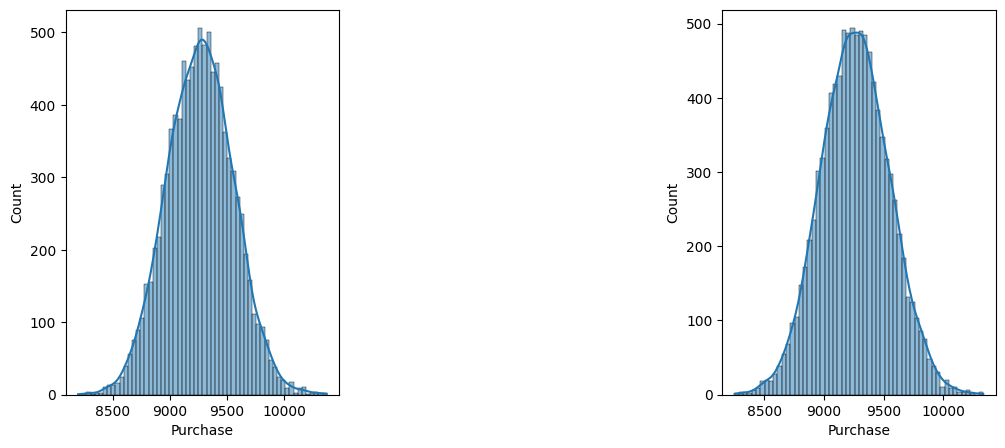

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(marriedSample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(unmarriedSample_300, kde=True)
plt.xlabel('Purchase')
plt.show()

In [ ]:
marriedSample_3000 = [married_customer['Purchase'].sample(3000).mean() for i in range(10000)]
marriedSample_3000 = np.array(marriedSample_3000)

In [ ]:
marriedSample_3000.mean(), marriedSample_3000.std()

(9262.996129800002, 91.43846085003106)

In [ ]:
norm(loc=9262.996129800002, scale=91.43846085003106).interval(0.95)

(9083.780039732164, 9442.212219867839)

In [ ]:
unmarriedSample_3000 = [unmarried_customer['Purchase'].sample(3000).mean() for i in range(10000)]
unmarriedSample_3000 = np.array(unmarriedSample_3000)

In [ ]:
unmarriedSample_3000.mean(), unmarriedSample_3000.std()

(9266.0994103, 91.40140150908762)

In [ ]:
norm(loc=9266.0994103, scale=91.40140150908762).interval(0.95)

(9086.955955205704, 9445.242865394295)

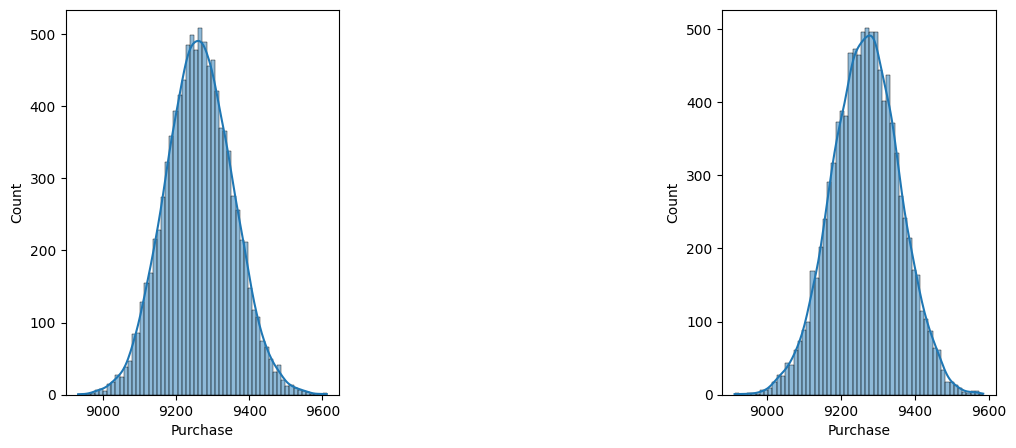

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(marriedSample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(unmarriedSample_3000, kde=True)
plt.xlabel('Purchase')
plt.show()

In [ ]:
marriedSample_30000 = [married_customer['Purchase'].sample(30000).mean() for i in range(10000)]
marriedSample_30000 = np.array(marriedSample_30000)

In [ ]:
marriedSample_30000.mean(), marriedSample_30000.std()

(9261.191018973333, 26.80299748894802)

In [ ]:
norm(loc=9261.191018973333, scale=26.80299748894802).interval(0.95)

(9208.658109217278, 9313.723928729389)

In [ ]:
unmarriedSample_30000 = [unmarried_customer['Purchase'].sample(30000).mean() for i in range(10000)]
unmarriedSample_30000 = np.array(unmarriedSample_30000)

In [ ]:
unmarriedSample_30000.mean(), unmarriedSample_30000.std()

(9266.23777803, 28.024784320161917)

In [ ]:
norm(loc=9266.23777803, scale=28.024784320161917).interval(0.95)

(9211.310210087979, 9321.16534597202)

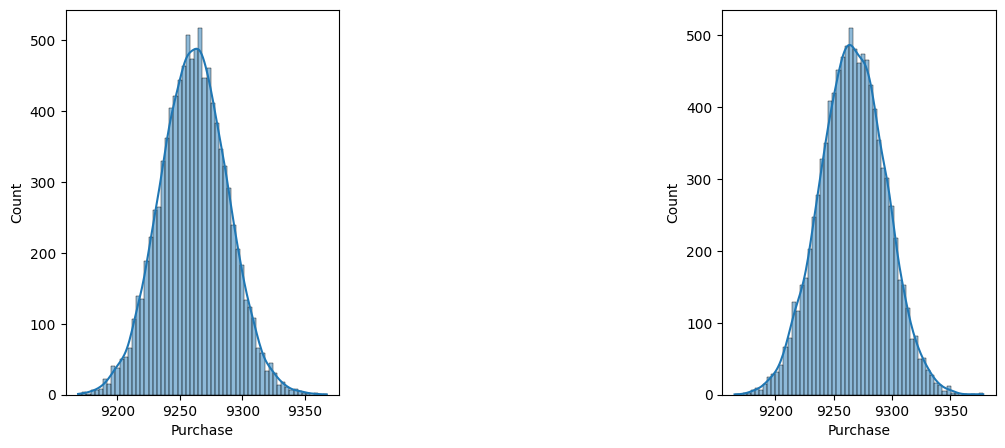

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(marriedSample_30000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(unmarriedSample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

# Observations for 300 Samples:
- The average purchase made by married customers is 9261.17 with a standard deviation of 5016.89.
- The average purchase made by unmarried customers is 9265.90 with a standard deviation of 5027.34.
- The sample average purchase made by a sample of 300 married customers is 9265.21 with a standard deviation of 290.69.
- The sample average purchase made by a sample of 300 unmarried customers is 9263.97 with a standard deviation of 288.17.
- The interval estimate of 300 married samples with a 95% confidence level is (8695.46, 9834.96).
- The interval estimate of 300 unmarried samples with a 95% confidence level is (8699.16, 9828.78).
- Married customers make more purchases compared to unmarried customers.
- The 95% confidence interval for married customers is tighter compared to the interval for unmarried customers.

# Observations for 3000 Samples:
- The sample average purchase made by a sample of 3000 married customers is 9262.99 with a standard deviation of 91.43.
- The sample average purchase made by a sample of 3000 unmarried customers is 9266.09 with a standard deviation of 91.40.
- The interval estimate of 3000 married samples with a 95% confidence level is (9083.78, 9442.21).
- The interval estimate of 3000 unmarried samples with a 95% confidence level is (9086.95, 9445.24).
- Married customers make more purchases compared to unmarried customers.

# Observations for 30000 Samples:
- The sample average purchase made by a sample of 30000 married customers is 9261.19 with a standard deviation of 26.80.
- The sample average purchase made by a sample of 30000 unmarried customers is 9266.23 with a standard deviation of 28.02.
- The interval estimate of 30000 married samples with a 95% confidence level is (9208.65, 9313.72).
- The interval estimate of 30000 unmarried samples with a 95% confidence level is (9211.31, 9321.16).
- Married customers make more purchases compared to unmarried customers.

- As the sample size increases up to 30000, the sample mean of purchases for married or unmarried customers is near the population mean of the purchase.
- As the sample size increases up to 30000, the standard deviation of married customers decreases, indicating less variability or dispersion among the data points, resulting in a taller and narrower bell curve and a more tightly spaced confidence interval.
- The margin of error, calculated as (Z - σ)/sqrt(n), decreases as the number of samples increases, leading to a smaller margin of error and a narrower confidence interval.
- As the sample size increases up to 30000, the distribution of sample means becomes approximately normally distributed. The sample average purchase of married customers is 9261.19, which is approximately the same as the population average purchase i.e. 9261.17.

# Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can company leverage this conclusion to make changes or improvements?

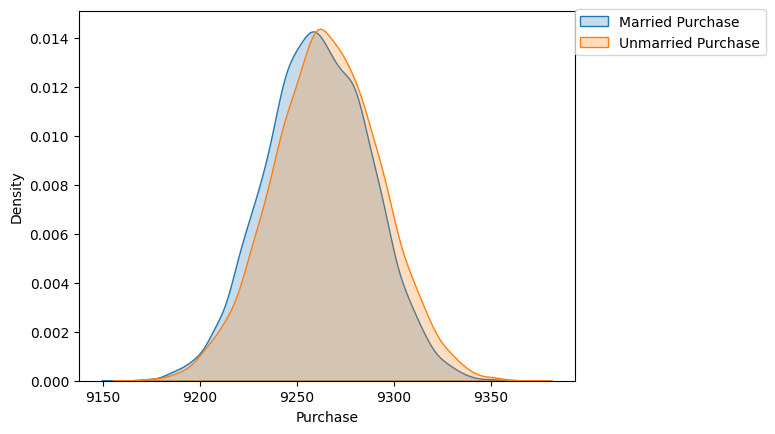

In [ ]:
sns.kdeplot(marriedSample_30000,  label='Married Purchase', fill=True)
sns.kdeplot(unmarriedSample_30000, label='Unmarried Purchase', fill=True)
plt.legend(loc=(1, 0.88))
plt.xlabel('Purchase')
plt.show()

- 95% confidence intervals of average married and unmarried spends are overlapping, it suggests that there may not be a statistically significant difference.
- The average purchase made by married customers are more as compared to averaage purchase made by unmarried customers. Company may contemplate concentrating on customers who are married, as they typically exhibit higher spending patterns compared to their unmarried counterparts.

# Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses according to their age.

In [ ]:
age_0_17 = w_df[w_df['Age']=='0-17']
age_18_25 = w_df[w_df['Age']=='18-25']
age_26_35 = w_df[w_df['Age']=='26-35']
age_36_45 = w_df[w_df['Age']=='36-45']
age_46_50 = w_df[w_df['Age']=='46-50']
age_51_55 = w_df[w_df['Age']=='51-55']
age_55plus = w_df[w_df['Age']=='55+']

Between 0-17

In [ ]:
age_0_17Sample_300 = [age_0_17['Purchase'].sample(300).mean() for i in range(10000)]
age_0_17Sample_300 = np.array(age_0_17Sample_300)

In [ ]:
age_0_17Sample_3000 = [age_0_17['Purchase'].sample(3000).mean() for i in range(10000)]
age_0_17Sample_3000 = np.array(age_0_17Sample_3000)

In [ ]:
age_0_17Sample_10000 = [age_0_17['Purchase'].sample(10000).mean() for i in range(10000)]
age_0_17Sample_10000 = np.array(age_0_17Sample_10000)

In [ ]:
age_0_17Sample_300.mean(), age_0_17Sample_300.std()

(8932.465216333332, 292.4969319439358)

In [ ]:
norm(loc=8932.465216333332, scale=292.4969319439358).interval(0.95)

(8359.181764134755, 9505.748668531909)

In [ ]:
age_0_17Sample_3000.mean(), age_0_17Sample_3000.std()

(8933.0910036, 84.12259524309275)

In [ ]:
norm(loc=8933.0910036, scale=84.12259524309275).interval(0.95)

(8768.213746637499, 9097.968260562502)

In [ ]:
age_0_17Sample_10000.mean(), age_0_17Sample_10000.std()

(8932.86260378, 29.770241322081816)

In [ ]:
norm(loc=8932.86260378, scale=29.770241322081816).interval(0.95)

(8874.514002977654, 8991.211204582347)

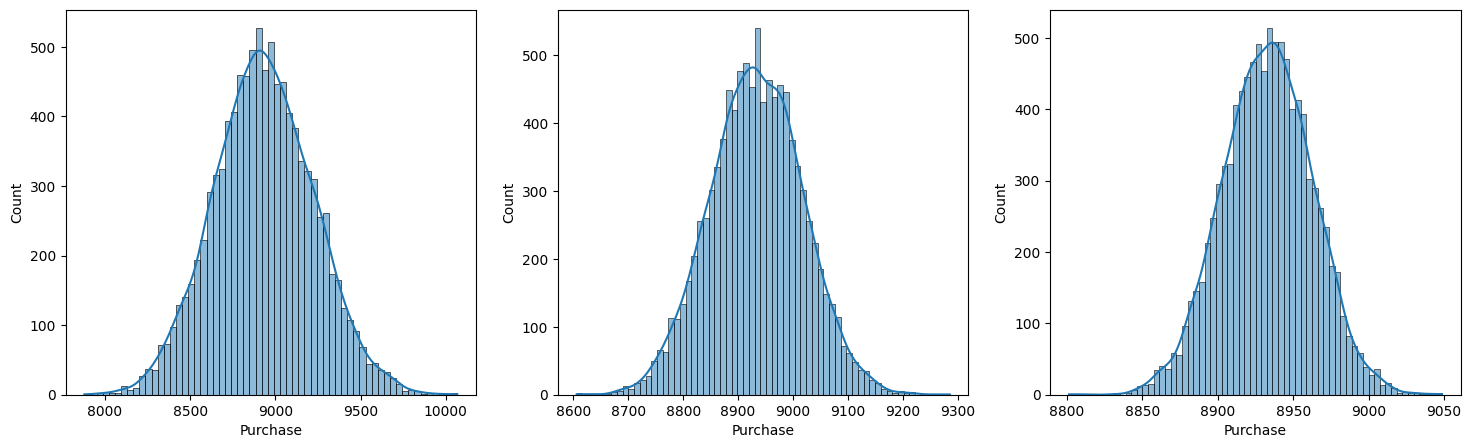

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_0_17Sample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_0_17Sample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_0_17Sample_10000, kde=True)
plt.xlabel('Purchase')
plt.show()

Between 18-25

In [ ]:
age_18_25Sample_300 = [age_18_25['Purchase'].sample(300).mean() for i in range(10000)]
age_18_25Sample_300 = np.array(age_18_25Sample_300)

In [ ]:
age_18_25Sample_3000 = [age_18_25['Purchase'].sample(3000).mean() for i in range(10000)]
age_18_25Sample_3000 = np.array(age_18_25Sample_3000)

In [ ]:
age_18_25Sample_30000 = [age_18_25['Purchase'].sample(30000).mean() for i in range(10000)]
age_18_25Sample_30000 = np.array(age_18_25Sample_30000)

In [ ]:
age_18_25Sample_300.mean(), age_18_25Sample_300.std()

(9170.598741, 288.3350911752551)

In [ ]:
norm(loc=9170.598741 , scale=288.3350911752551).interval(0.95)

(8605.472346817427, 9735.725135182573)

In [ ]:
age_18_25Sample_3000.mean(), age_18_25Sample_3000.std()

(9170.031418066666, 91.15219950673645)

In [ ]:
norm(loc=9170.031418066666, scale=91.15219950673645).interval(0.95)

(8991.376389921854, 9348.686446211479)

In [ ]:
age_18_25Sample_30000.mean(), age_18_25Sample_30000.std()

(9169.51513153, 24.49486727976044)

In [ ]:
norm(loc=9169.51513153, scale=24.49486727976044).interval(0.95)

(9121.506073855582, 9217.52418920442)

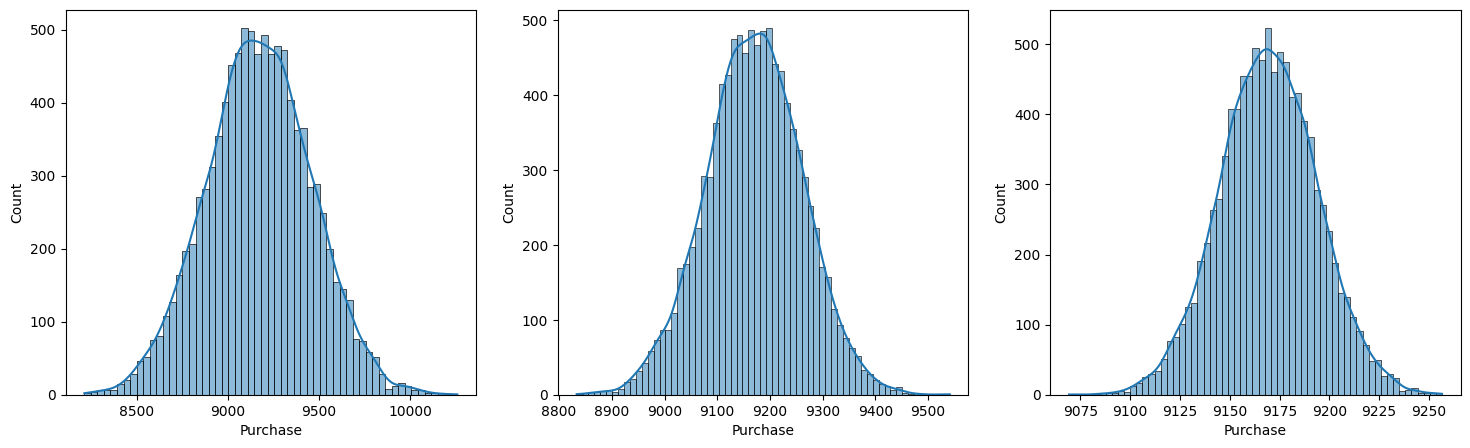

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_18_25Sample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_18_25Sample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_18_25Sample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

Between 26-35

In [ ]:
age_26_35Sample_300 = [age_26_35['Purchase'].sample(300).mean() for i in range(10000)]
age_26_35Sample_300 = np.array(age_26_35Sample_300)

In [ ]:
age_26_35Sample_3000 = [age_26_35['Purchase'].sample(3000).mean() for i in range(10000)]
age_26_35Sample_3000 = np.array(age_26_35Sample_3000)

In [ ]:
age_26_35Sample_30000 = [age_26_35['Purchase'].sample(30000).mean() for i in range(10000)]
age_26_35Sample_30000 = np.array(age_26_35Sample_30000)

In [ ]:
age_26_35Sample_300.mean(), age_26_35Sample_300.std()

(9250.797457666667, 288.98153181046376)

In [ ]:
norm(loc=9250.797457666667, scale=288.98153181046376).interval(0.95)

(8684.404063120943, 9817.190852212392)

In [ ]:
age_26_35Sample_3000.mean(), age_26_35Sample_3000.std()

(9250.135834766668, 91.01223380406749)

In [ ]:
norm(loc=9250.135834766668, scale=91.01223380406749).interval(0.95)

(9071.755134358156, 9428.51653517518)

In [ ]:
age_26_35Sample_30000.mean(), age_26_35Sample_30000.std()

(9252.978128386667, 26.801421067982243)

In [ ]:
norm(loc=9252.978128386667, scale=26.801421067982243).interval(0.95)

(9200.44830835893, 9305.507948414404)

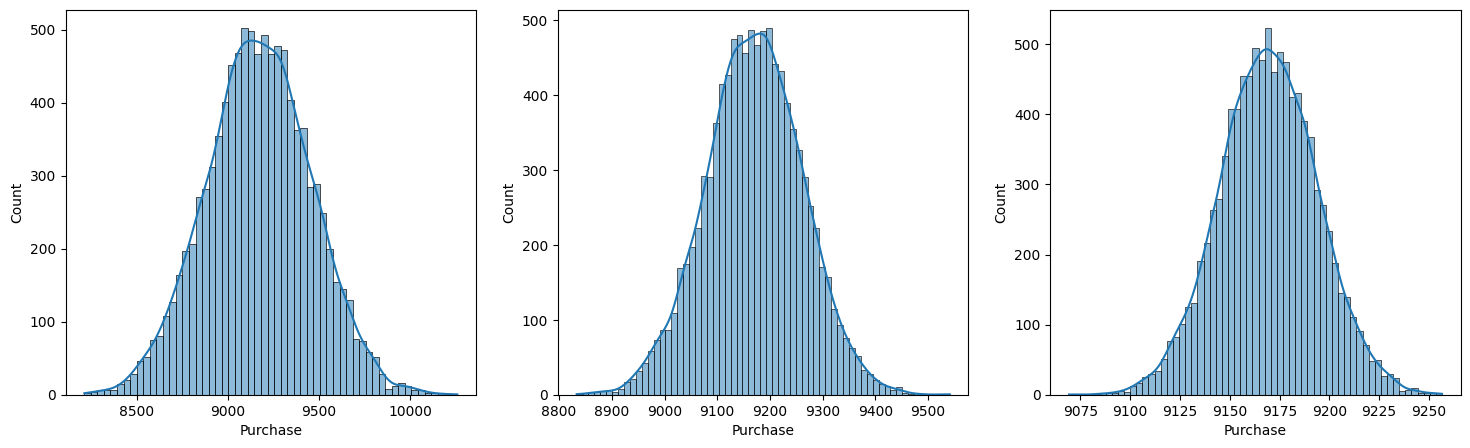

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_18_25Sample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_18_25Sample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_18_25Sample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

Between 36-45

In [ ]:
age_36_45Sample_300 = [age_36_45['Purchase'].sample(300).mean() for i in range(10000)]
age_36_45Sample_300 = np.array(age_36_45Sample_300)

In [ ]:
age_36_45Sample_3000 = [age_36_45['Purchase'].sample(3000).mean() for i in range(10000)]
age_36_45Sample_3000 = np.array(age_36_45Sample_3000)

In [ ]:
age_36_45Sample_30000 = [age_36_45['Purchase'].sample(30000).mean() for i in range(10000)]
age_36_45Sample_30000 = np.array(age_36_45Sample_30000)

In [ ]:
age_36_45Sample_300.mean(), age_36_45Sample_300.std()

(9337.943471999999, 285.9183011680487)

In [ ]:
norm(loc=9337.943471999999, scale=285.9183011680487).interval(0.95)

(8777.553899189747, 9898.333044810252)

In [ ]:
age_36_45Sample_3000.mean(), age_36_45Sample_3000.std()

(9330.2817298, 91.71167941714691)

In [ ]:
norm(loc=9330.2817298, scale=91.71167941714691).interval(0.95)

(9150.53014118071, 9510.033318419291)

In [ ]:
age_36_45Sample_30000.mean(), age_36_45Sample_30000.std()

(9331.14456026, 25.214931287704417)

In [ ]:
norm(loc=9331.14456026, scale=25.214931287704417).interval(0.95)

(9281.724203063446, 9380.564917456553)

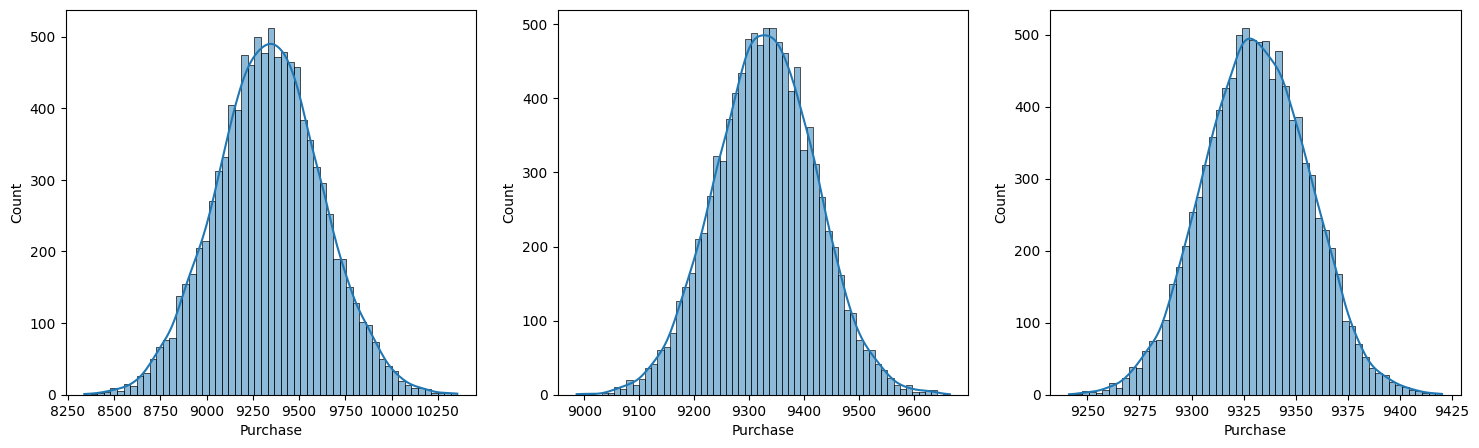

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_36_45Sample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_36_45Sample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_36_45Sample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

Between 46-50

In [ ]:
age_46_50Sample_300 = [age_46_50['Purchase'].sample(300).mean() for i in range(10000)]
age_46_50Sample_300 = np.array(age_46_50Sample_300)

In [ ]:
age_46_50Sample_3000 = [age_46_50['Purchase'].sample(3000).mean() for i in range(10000)]
age_46_50Sample_3000 = np.array(age_46_50Sample_3000)

In [ ]:
age_46_50Sample_30000 = [age_46_50['Purchase'].sample(30000).mean() for i in range(10000)]
age_46_50Sample_30000 = np.array(age_46_50Sample_30000)

In [ ]:
age_46_50Sample_300.mean(), age_46_50Sample_300.std()

(9207.525685333332, 284.51698520624836)

In [ ]:
norm(loc=9207.525685333332, scale=284.51698520624836).interval(0.95)

(8649.88264133917, 9765.168729327494)

In [ ]:
age_46_50Sample_3000.mean(), age_46_50Sample_3000.std()

(9208.665448133332, 86.88232478646492)

In [ ]:
norm(loc=9208.665448133332, scale=86.88232478646492).interval(0.95)

(9038.37922065875, 9378.951675607914)

In [ ]:
age_46_50Sample_30000.mean(), age_46_50Sample_30000.std()

(9208.568566853333, 16.89176266452106)

In [ ]:
norm(loc=9208.568566853333, scale=16.89176266452106).interval(0.95)

(9175.461320395474, 9241.675813311193)

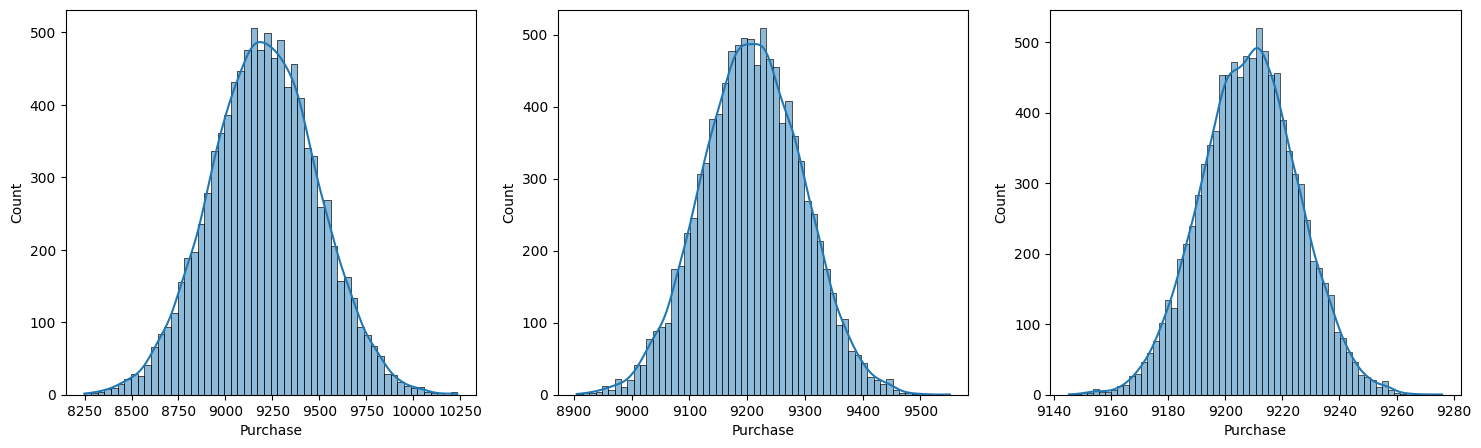

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_46_50Sample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_46_50Sample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_46_50Sample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

Between 51-55

In [ ]:
age_51_55Sample_300 = [age_51_55['Purchase'].sample(300).mean() for i in range(10000)]
age_51_55Sample_300 = np.array(age_51_55Sample_300)

In [ ]:
age_51_55Sample_3000 = [age_51_55['Purchase'].sample(3000).mean() for i in range(10000)]
age_51_55Sample_3000 = np.array(age_51_55Sample_3000)

In [ ]:
age_51_55Sample_30000 = [age_51_55['Purchase'].sample(30000).mean() for i in range(10000)]
age_51_55Sample_30000 = np.array(age_51_55Sample_30000)

In [ ]:
age_51_55Sample_300.mean(), age_51_55Sample_300.std()

(9534.228304666669, 289.5990562482805)

In [ ]:
norm(loc=9534.228304666669, scale=289.5990562482805).interval(0.95)

(8966.62458446325, 10101.832024870087)

In [ ]:
age_51_55Sample_3000.mean(), age_51_55Sample_3000.std()

(9536.377975633332, 88.65683150461068)

In [ ]:
norm(loc=9536.377975633332, scale=88.65683150461068).interval(0.95)

(9362.613778900859, 9710.142172365804)

In [ ]:
age_51_55Sample_30000.mean(), age_51_55Sample_30000.std()

(9535.09261037, 13.61223986221225)

In [ ]:
norm(loc=9535.09261037, scale=13.61223986221225).interval(0.95)

(9508.413110491143, 9561.772110248858)

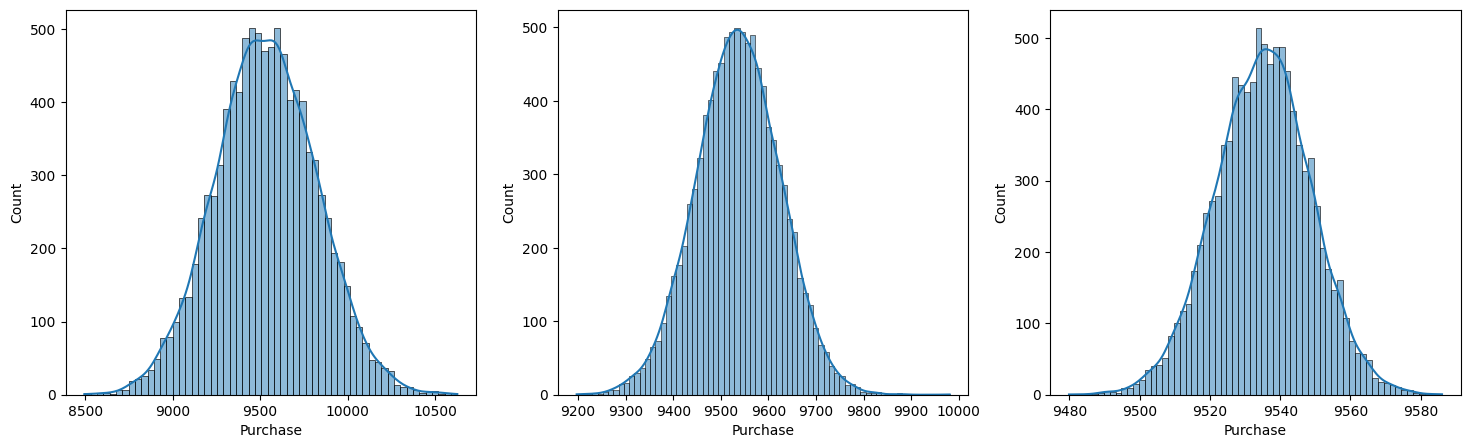

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_51_55Sample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_51_55Sample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_51_55Sample_30000, kde=True)
plt.xlabel('Purchase')
plt.show()

Age group 55+

In [ ]:
age_55plusSample_300 = [age_55plus['Purchase'].sample(300).mean() for i in range(10000)]
age_55plusSample_300 = np.array(age_55plusSample_300)

In [ ]:
age_55plusSample_3000 = [age_55plus['Purchase'].sample(3000).mean() for i in range(10000)]
age_55plusSample_3000 = np.array(age_55plusSample_3000)

In [ ]:
age_55plusSample_10000 = [age_55plus['Purchase'].sample(10000).mean() for i in range(10000)]
age_55plusSample_10000 = np.array(age_55plusSample_10000)

In [ ]:
age_55plusSample_300.mean(), age_55plusSample_300.std()

(9339.249961, 286.49408395118087)

In [ ]:
norm(loc=9339.249961, scale=286.49408395118087).interval(0.95)

(8777.73187467189, 9900.768047328109)

In [ ]:
age_55plusSample_3000.mean(), age_55plusSample_3000.std()

(9337.9210776, 85.025434926275)

In [ ]:
norm(loc=9337.9210776, scale=85.025434926275).interval(0.95)

(9171.274287374647, 9504.567867825353)

In [ ]:
age_55plusSample_10000.mean(), age_55plusSample_10000.std()

(9336.23307155, 36.41071013723481)

In [ ]:
norm(loc=9336.23307155, scale=36.41071013723481).interval(0.95)

(9264.869391029491, 9407.596752070507)

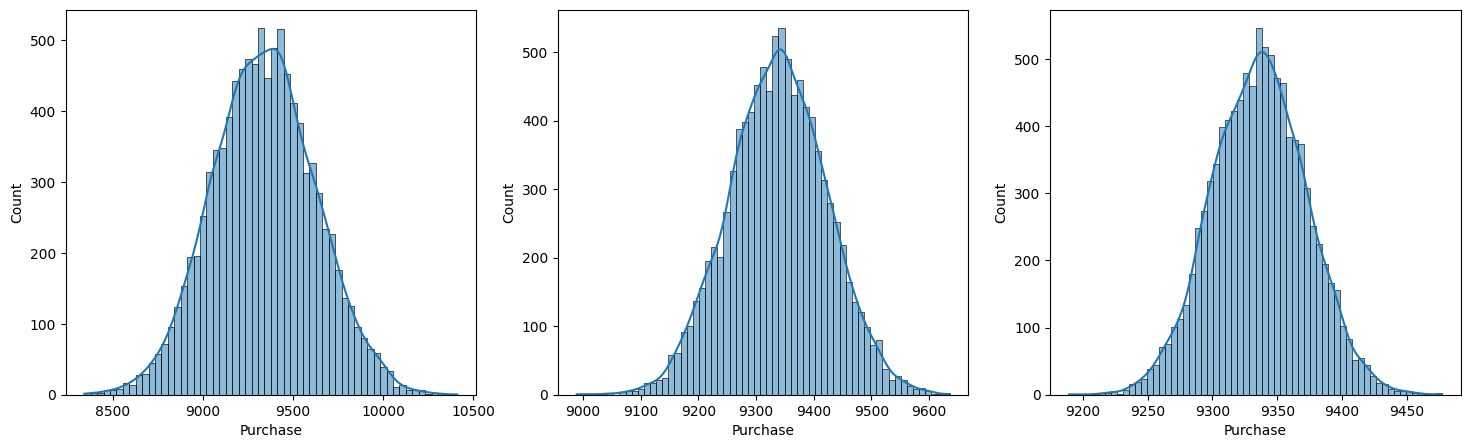

In [ ]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
sns.histplot(age_55plusSample_300, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,2)
sns.histplot(age_55plusSample_3000, kde=True)
plt.xlabel('Purchase')
plt.subplot(1,3,3)
sns.histplot(age_55plusSample_10000, kde=True)
plt.xlabel('Purchase')
plt.show()

In [ ]:
w_df['Purchase'].mean(), w_df['Purchase'].std()

(9263.968712959126, 5023.065393820582)

- Upon analysis, the number or customers in the age groups 0-17 and 55+ is lower in comparison to the another.
- Average purchase = 9263.96, Standard deviation = 5023.06
- The sample mean of the 0-17 age group with a sample size of 10000 = 8932.86, sample standard deviation = 29.77.
- 95% CI = (8874.51, 8991.21)
- The sample mean of the 18-25 age group with a sample size of 30000 = 9169.51, sample standard deviation = 24.49
- 95% CI = (9121.50, 9217.52)
- The sample mean of the 26-35 age group with a sample size of 30000 = 9252.97, sample standard deviation = 26.80
- 95% CI = (9200.44, 9305.50)
- The sample mean of the 36-45 age group with a sample size of 30000 = 9331.14, sample standard deviation = 25.21
- 95% CI = (9281.72, 9380.56)
- The sample mean of the 46-50 age group with a sample size of 30000 = 9208.56, sample standard deviation = 16.89
- 95% CI = (9175.46, 9241.67)
- The sample mean of the 51-55 age group with a sample size of 30000 = 9535.09, sample standard deviation = 13.61
- 95% CI = (9508.41, 9561.77)
- The sample mean of the 55+ age group with a sample size of 10000 = 9336.23, sample standard deviation = 36.41
- 95% CI = (9264.86, 9407.59)
- Highest Sample average purchase of age group 51-55 is 9535.09 with standard deviation is 13.61. And Interval range is (9508.41, 9561.77) more tightly spaced confidence interval.
- Top3 highest Sample average purchases are observed in the age groups 36-45, 26-35, 18-25 with more tightly spaced confidence interval.
- As the sample size increases up to 30000, the standard deviation of different age groups customers decreases, indicating less variability or dispersion among the data points, resulting in a taller and narrower bell curve and a more tightly spaced confidence interval.
- The margin of error, calculated as (Z - σ)/sqrt(n) decreases as the number of samples increases, leading to a smaller margin of error and a narrower confidence interval.

# Conclude the results and check if the confidence intervals of different age groups spends are overlapping or not overlapping. How can company leverage this conclusion to make changes or improvements?

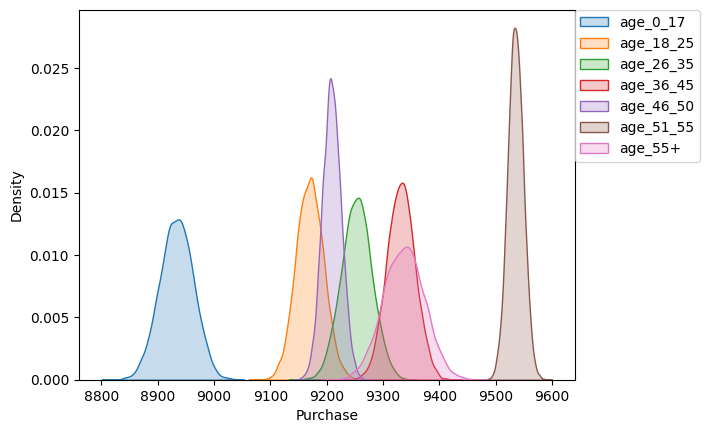

In [ ]:
sns.kdeplot(age_0_17Sample_10000,  label='age_0_17', fill=True)
sns.kdeplot(age_18_25Sample_30000, label='age_18_25', fill=True)
sns.kdeplot(age_26_35Sample_30000, label='age_26_35', fill=True)
sns.kdeplot(age_36_45Sample_30000, label='age_36_45', fill=True)
sns.kdeplot(age_46_50Sample_30000, label='age_46_50', fill=True)
sns.kdeplot(age_51_55Sample_30000, label='age_51_55', fill=True)
sns.kdeplot(age_55plusSample_10000, label='age_55+', fill=True)
plt.legend(loc=(1, 0.59))
plt.xlabel('Purchase')
plt.show()

- 95% confidence intervals of average 0-17 and 55+ spends are not overlapping, it suggests that there may be a statistically significant difference.
- The average purchase made by married customers are more as compared to average purchase made by unmarried customers. Company may contemplate concentrating on customers who are belongs to age groups 26-35 and 36-45, as they typically exhibit higher spending patterns compared to their other age groups counterparts.

# Recommendations

- 75% of the users are male, and the majority of them are married. Additionally, the highest number of users falls within the 26-35 age group, with the top3 products purchased by these customers being in categories 5, 1, and 8. Therefore, it is recommended that company prioritize this customer demographic by giving them more importance.
- The top five product categories with the maximum user engagement are 6, 7, 14, 15 and 9.. Therefore, it is recommended that company places greater emphasis on catering to this specific customer demographic.
- The purchase within product categories 5 and 6 has approximately equal numbers of males and females. Therefore, it is recommended that company should increase its production.
- Product categories 14 and 15 have been more frequently purchased by females compared to males. Therefore, recommending that company give more attention to women than men for these types of product categories.
- The majority of products in categories 5, 1, and 8 have been purchased by individuals in the age group of 26-35. Consequently, it is advisable for company to prioritize this customer demographic by assigning them greater importance than others.
- The average purchase made by male customers are more as compared to average purchase made by female customers. Therefore, it is recommended that male customers tend to spend more compared to their female counterparts, company might contemplate shifting its focus towards this demographic.
- The average purchase made by married customers is higher compared to that made by unmarried customers. Hence, focusing on married customers over unmarried ones is recommended for company.